## Constructing Different CNN Architectures on MNIST Dataset

<h2> Data Overview </h2>

The MNIST Dataset is a dataset of Handwritten Characters pertaining to 10 integers from 0 to 9, which is used for Training in the case of Many Image Processing Tasks. We have an input square image of size (28 px* 28 px), which makes the corresponding vector that we obtain to be 784-dimensional. After this, we obtain a Matrix of this dimensionality where each cell in the Matrix corresponds to an integral number from 0 to 255 -> The Higher is the value of this number, the darker that particular pixel value is. 

There are a total of 60,000 Training Datapoints and a total of 10,000 Test Datapoints in MNIST. We build various models in order to try and minimize our Test Accuracy and Test Log Loss values. We train each of our models on a total of 85 epochs so that the value is not too small for SGD type Optimizations to try and achieve convergence.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils 
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from sklearn.model_selection import train_test_split

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
    
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

This is how our Images look like in the MNIST Dataset :

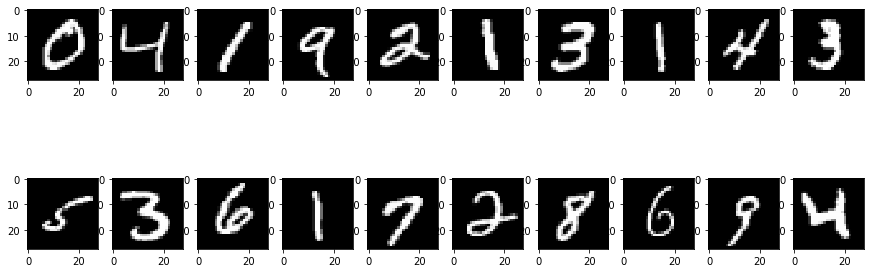

In [4]:
#Display or plot a number from the MNIST train dataset. Find the corresponding labels below the images.

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,15))
for i in range(1,21):
    row = i
    grid_data = x_train[row].reshape(28,28) #Reshape from 1d to 2d pixel array
    plt.subplot(5,10,row)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

# 1. Number of Convolution Layers in the Neural Network = 2

<h4> 1.1 Constructing the Neural Network </h4>

In [5]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

<h4> 1.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [6]:
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M1_history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, \
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2324 - accuracy: 0.9297 - val_loss: 0.0571 - val_accuracy: 0.9808
Epoch 2/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0834 - accuracy: 0.9754 - val_loss: 0.0446 - val_accuracy: 0.9855
Epoch 3/30
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0627 - accuracy: 0.9812 - val_loss: 0.0330 - val_accuracy: 0.9885
Epoch 4/30
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 5/30
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 6/30
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0303 - val_accuracy: 0.9896
Epoch 7/30
60000/60000 [==============================] - 89s 1ms/st

<h4> 1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.032340202385733575
Test accuracy: 0.9919999837875366


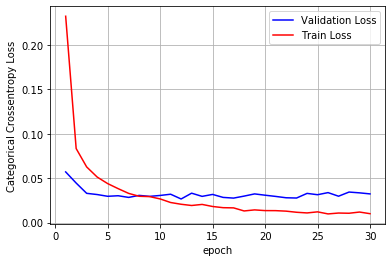

In [7]:
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.history we will have a list of length equal to number of epochs

vy = M1_history.history['val_loss']
ty = M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2. Number of Convolution Layers in the Neural Network = 3

<h2> 2.1 Model 2 : </h2>

<h4> 2.1.1 Constructing the Neural Network </h4>

In [8]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)      

<h4> 2.1.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [10]:
from keras import optimizers
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M2_history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 583s 10ms/step - loss: 0.1467 - accuracy: 0.9556 - val_loss: 6.3708 - val_accuracy: 0.4519
Epoch 2/30
60000/60000 [==============================] - 599s 10ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0326 - val_accuracy: 0.9903
Epoch 3/30
60000/60000 [==============================] - 602s 10ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 4/30
60000/60000 [==============================] - 587s 10ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 5/30
60000/60000 [==============================] - 589s 10ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0307 - val_accuracy: 0.9909
Epoch 6/30
60000/60000 [==============================] - 589s 10ms/step - loss: 0.0239 - accuracy: 0.9930 - val_loss: 0.0217 - val_accuracy: 0.9917
Epoch 7/30
60000/60000 [==============================] 

<h4> 2.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.025601864825535336
Test accuracy: 0.9945999979972839


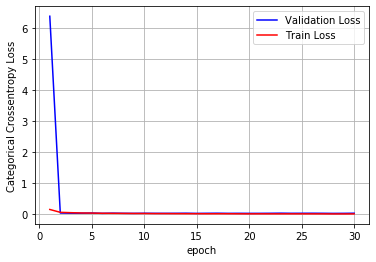

In [11]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the parameter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M2_history.history['val_loss']
ty = M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 2.2 Model 3 : </h2>

<h4> 2.2.1 Constructing the Neural Network </h4>

In [12]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model3 = Sequential()
model3.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', kernel_initializer='he_uniform',
                 input_shape=input_shape, padding='same'))
model3.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

model3.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(num_classes, activation='softmax',kernel_initializer='he_uniform'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)       

<h4> 2.2.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [13]:
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M3_history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 309s 5ms/step - loss: 0.8541 - accuracy: 0.7377 - val_loss: 0.1921 - val_accuracy: 0.9421
Epoch 2/30
60000/60000 [==============================] - 305s 5ms/step - loss: 0.2103 - accuracy: 0.9434 - val_loss: 0.0673 - val_accuracy: 0.9807
Epoch 3/30
60000/60000 [==============================] - 301s 5ms/step - loss: 0.1360 - accuracy: 0.9647 - val_loss: 0.0527 - val_accuracy: 0.9846
Epoch 4/30
60000/60000 [==============================] - 296s 5ms/step - loss: 0.1158 - accuracy: 0.9695 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 5/30
60000/60000 [==============================] - 295s 5ms/step - loss: 0.1000 - accuracy: 0.9749 - val_loss: 0.0330 - val_accuracy: 0.9909
Epoch 6/30
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0862 - accuracy: 0.9784 - val_loss: 0.0372 - val_accuracy: 0.9902
Epoch 7/30
60000/60000 [==============================] - 295s

<h4> 2.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.023077930994681084
Test accuracy: 0.994700014591217


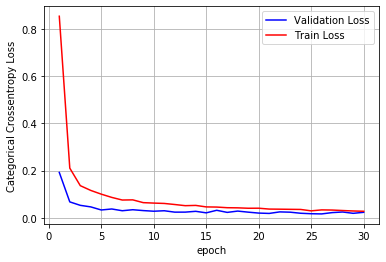

In [14]:
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M3_history.history['val_loss']
ty = M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3. Number of Convolution Layers in the Neural Network = 5

<h2> 3.1 Model 4 : </h2>

<h4> 3.1.1 Constructing the Neural Network </h4>

In [5]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', kernel_initializer='he_uniform',
                 input_shape=input_shape, padding='same'))
model4.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

model4.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

model4.add(Flatten())

model4.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(num_classes, activation='softmax',kernel_initializer='he_uniform'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)      

<h4> 3.1.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [6]:
from keras import optimizers
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M4_history = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 603s 10ms/step - loss: 0.8482 - accuracy: 0.7383 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 2/30
60000/60000 [==============================] - 596s 10ms/step - loss: 0.1835 - accuracy: 0.9514 - val_loss: 0.0493 - val_accuracy: 0.9857
Epoch 3/30
60000/60000 [==============================] - 628s 10ms/step - loss: 0.1292 - accuracy: 0.9658 - val_loss: 0.0562 - val_accuracy: 0.9834
Epoch 4/30
60000/60000 [==============================] - 657s 11ms/step - loss: 0.1042 - accuracy: 0.9736 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 5/30
60000/60000 [==============================] - 655s 11ms/step - loss: 0.0893 - accuracy: 0.9772 - val_loss: 0.0347 - val_accuracy: 0.9906
Epoch 6/30
60000/60000 [==============================] - 654s 11ms/step - loss: 0.0767 - accuracy: 0.9807 - val_loss: 0.0303 - val_accuracy: 0.9926
Epoch 7/30
60000/60000 [==============================] 

<h4> 3.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.024979012705250353
Test accuracy: 0.9940999746322632


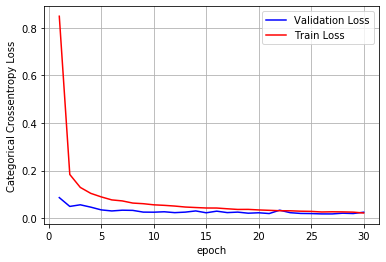

In [7]:
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M4_history.history['val_loss']
ty = M4_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3.2 Model 5 : </h2>

<h4> 3.2.1 Constructing the Neural Network </h4>

In [8]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model5 = Sequential()
model5.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', kernel_initializer='he_uniform',
                 input_shape=input_shape, padding='same'))
model5.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model5.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

model5.add(Conv2D(128, kernel_size = (5, 5), activation='relu',kernel_initializer='he_uniform', padding='same'))
model5.add(Conv2D(128, kernel_size = (5, 5), activation='relu',kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

model5.add(Flatten())

model5.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax',kernel_initializer='he_uniform'))
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)      

<h4> 3.2.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [9]:
model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M5_history = model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1009s 17ms/step - loss: 0.7737 - accuracy: 0.7653 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 2/30
60000/60000 [==============================] - 996s 17ms/step - loss: 0.1541 - accuracy: 0.9608 - val_loss: 0.1129 - val_accuracy: 0.9670
Epoch 3/30
60000/60000 [==============================] - 966s 16ms/step - loss: 0.1084 - accuracy: 0.9724 - val_loss: 0.0568 - val_accuracy: 0.9861
Epoch 4/30
60000/60000 [==============================] - 942s 16ms/step - loss: 0.0830 - accuracy: 0.9790 - val_loss: 0.1067 - val_accuracy: 0.9729
Epoch 5/30
60000/60000 [==============================] - 983s 16ms/step - loss: 0.0756 - accuracy: 0.9813 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 6/30
60000/60000 [==============================] - 992s 17ms/step - loss: 0.0634 - accuracy: 0.9851 - val_loss: 0.0331 - val_accuracy: 0.9901
Epoch 7/30
60000/60000 [==============================]

<h4> 3.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.01890334000485018
Test accuracy: 0.9958999752998352


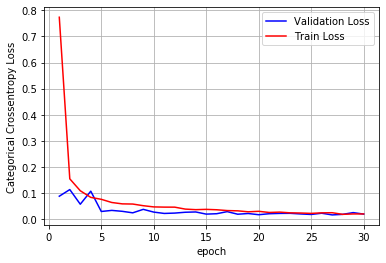

In [10]:
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M5_history.history['val_loss']
ty = M5_history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 4. Number of Convolution Layers in the Neural Network = 7

<h2> 4.1 Model 6 : </h2>

<h4> 4.1.1 Constructing the Neural Network </h4>

In [5]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model6 = Sequential()
model6.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', kernel_initializer='he_uniform',
                 input_shape=input_shape, padding='same'))
model6.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.5))

model6.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.5))

model6.add(Conv2D(256, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(Conv2D(256, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(Conv2D(256, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.5))

model6.add(Flatten())

model6.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax',kernel_initializer='he_uniform'))
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)      

<h4> 4.1.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [6]:
model6.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

M6_history = model6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 961s 16ms/step - loss: 1.3383 - accuracy: 0.5631 - val_loss: 3.9429 - val_accuracy: 0.1914
Epoch 2/30
60000/60000 [==============================] - 950s 16ms/step - loss: 0.2973 - accuracy: 0.9205 - val_loss: 0.0848 - val_accuracy: 0.9767
Epoch 3/30
60000/60000 [==============================] - 948s 16ms/step - loss: 0.1586 - accuracy: 0.9604 - val_loss: 0.0623 - val_accuracy: 0.9826
Epoch 4/30
60000/60000 [==============================] - 941s 16ms/step - loss: 0.1163 - accuracy: 0.9719 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 5/30
60000/60000 [==============================] - 933s 16ms/step - loss: 0.0971 - accuracy: 0.9769 - val_loss: 0.0489 - val_accuracy: 0.9868
Epoch 6/30
60000/60000 [==============================] - 885s 15ms/step - loss: 0.0852 - accuracy: 0.9794 - val_loss: 0.0879 - val_accuracy: 0.9797
Epoch 7/30
60000/60000 [==============================] 

<h4> 4.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.018550323320517783
Test accuracy: 0.9959999918937683


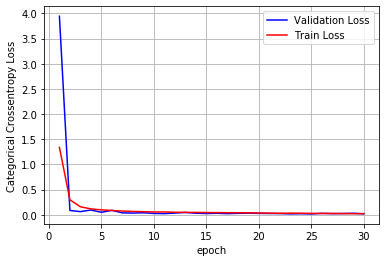

In [7]:
score6 = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M6_history.history['val_loss']
ty = M6_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 4.2 Model 7 : </h2>

<h4> 4.2.1 Constructing the Neural Network </h4>

In [7]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model7 = Sequential()
model7.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', kernel_initializer='he_uniform',
                 input_shape=input_shape, padding='same'))
model7.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(Conv2D(64, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))

model7.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(Conv2D(128, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))

model7.add(Conv2D(256, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(Conv2D(256, kernel_size = (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.5))

model7.add(Flatten())

model7.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(num_classes, activation='softmax',kernel_initializer='he_uniform'))
model7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)      

<h4> 4.2.2 Running the Neural Network on Train & Validation Datasets for 30 Epochs </h4>

In [8]:
model7.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.001), 
               metrics=['accuracy'])

M7_history = model7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 898s 15ms/step - loss: 1.4802 - accuracy: 0.5267 - val_loss: 0.8756 - val_accuracy: 0.7228
Epoch 2/30
60000/60000 [==============================] - 917s 15ms/step - loss: 0.3290 - accuracy: 0.9109 - val_loss: 0.1117 - val_accuracy: 0.9677
Epoch 3/30
60000/60000 [==============================] - 910s 15ms/step - loss: 0.1673 - accuracy: 0.9576 - val_loss: 0.0726 - val_accuracy: 0.9797
Epoch 4/30
60000/60000 [==============================] - 905s 15ms/step - loss: 0.1210 - accuracy: 0.9699 - val_loss: 0.0662 - val_accuracy: 0.9830
Epoch 5/30
60000/60000 [==============================] - 861s 14ms/step - loss: 0.1074 - accuracy: 0.9730 - val_loss: 0.0402 - val_accuracy: 0.9908
Epoch 6/30
60000/60000 [==============================] - 836s 14ms/step - loss: 0.0877 - accuracy: 0.9782 - val_loss: 0.0378 - val_accuracy: 0.9909
Epoch 7/30
60000/60000 [==============================] 

<h4> 4.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test loss: 0.018387412990181474
Test accuracy: 0.9962999820709229


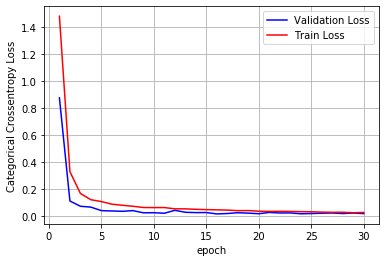

In [9]:
score7 = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = M7_history.history['val_loss']
ty = M7_history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5. Conclusion

The MNIST Dataset is a dataset of Handwritten Characters pertaining to 10 integers from 0 to 9, which is used for Training in the case of Many Image Processing Tasks. We have an input square image of size (28 px* 28 px), which makes the corresponding vector that we obtain to be 784-dimensional. After this, we obtain a Matrix of this dimensionality where each cell in the Matrix corresponds to an integral number from 0 to 255 -> The Higher is the value of this number, the darker that particular pixel value is. 

There are a total of 60,000 Training Datapoints and a total of 10,000 Test Datapoints in MNIST. We build various models with various Convolution Layer Architectures in order to try and minimize our Test Accuracy and Test Log Loss values. We train each of our models on a total of 30 epochs.

First we work on an architecture with 2 Convolution layers and 1 Hidden Layer with Relu as the Activation Unit.{We are only using Relu as the Activation Unit and Adam as the optimizer with He-Uniform initialization and a small enough learning rate of 0.001 in order to achieve the best possible convergence}. Also we are using Maxpooling, Batch Normalization as well as Dropoout whenever it is thought to be necessary. Note that here we are not tuning the Dropout Value because of the limit of time and computational resources. 

This is followed by further new models with Convolutional Layers of 3,5 and 7 in number with Kernels of Various sizes. Since it is always recommended to have Kernels of odd sizes, we tried modelling with (3 * 3), (5 * 5) and (7 * 7) kernels and variation in the number of Hidden Layers. Also, we know that VGG-16 Architecture is state of the art. Therefore we have taken this architecture as inspiration and tried to replicate it as much as possible with our maximum 7 Convolutional Layers. 

We are training all the models on a fix number of 30 epochs for each model for better comparison. However, for each model we also compare the Loss Value across different epoch numbers for Train and Validation Datasets, so as to the Epoch Number for which this loss is minimum. Along with this, we also need to ensure that the gap between the Train and Validation curves in this plot is not too big, which would indicate overfitting in such a scenario.

***Also, we could have carried out Hyperparameter Tuning using Hyperas by splitting the data into Train, CV and Test but we have not done so because our dataset of 60K Training Datapoints is anyway not that big : If we split into Train and CV, Train will have only 48K Training Datapoints and 12K CV Datapoints. Also, Test anyway has 10K Datapoints. I tried following this approach but our Test Log Loss was coming out worse when we trained on 48K Datapoints.***

The Summary of each of our models that we have built so far is as shown below :

In [6]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=["Model #","Number of Convolutional Layers","Test Accuracy","Test Log Loss"]

print("="*100)

x.add_row(["Model 1","Two", "99.19%","0.0323"])
x.add_row(["Model 2","Three", "99.45%","0.0256"])
x.add_row(["Model 3","Three", "99.47%","0.0230"])
x.add_row(["Model 4","Five", "99.40%","0.0249"])
x.add_row(["Model 5","Five", "99.59%","0.0189"])
x.add_row(["Model 6","Seven", "99.60%","0.0186"])
x.add_row(["Model 7","Seven", "99.63%","0.0183"])

print(x)
print('-'*100)

+---------+--------------------------------+---------------+---------------+
| Model # | Number of Convolutional Layers | Test Accuracy | Test Log Loss |
+---------+--------------------------------+---------------+---------------+
| Model 1 |              Two               |     99.19%    |     0.0323    |
| Model 2 |             Three              |     99.45%    |     0.0256    |
| Model 3 |             Three              |     99.47%    |     0.0230    |
| Model 4 |              Five              |     99.40%    |     0.0249    |
| Model 5 |              Five              |     99.59%    |     0.0189    |
| Model 6 |             Seven              |     99.60%    |     0.0186    |
| Model 7 |             Seven              |     99.63%    |     0.0183    |
+---------+--------------------------------+---------------+---------------+
----------------------------------------------------------------------------------------------------
